# A Theoretical and Empirical Analysis of Expected Sarsa:
# Compared with Sarsa and Q-learning



In this IPython notebook I will walk you through some of the best Temporal Difference Learning algorithms known in the literature. We will study the paper by Harm van Seijen et al. "A Theoretical and Empirical Analysis of Expected Sarsa".

A copy of the paper can be obtained at this url: https://staff.science.uva.nl/s.a.whiteson/pubs/vanseijenadprl09.pdf

Fun fact: Expected Sarsa first appeared as an exericse question in Sutton and Barto's first edition book [1998]. The authors of the above paper popularized it as Expected Sarsa in 2009.


TD learning methods is a combination of ideas drawn from Monte Carlo methods and Dynamic Programming methods. In particular MC ideas help TD methods to learn from sampled of episodes without the requirement of a model of the environment and DP ideas help to execute the task in steps and update its estimates in part on other learned episodes i.e. they bootstrap.

We study a RL problem in terms or prediction (estimating the optimal value function by evaluating a policy) and control (estimating an optimal policy by estimating the optimal Q values). We focus here on TD Control problems namely: Sarsa, Q-learning and variant of Sarsa known as Expected Sarsa.

On-policy: These methods attempt to evaluate or improve the policy that is usd to make decisions.
Off-policy: These methods evaluate or imrpove a policy different from that used to generate the data. Thus we have two policies: Behaviour and Target policies.


$$\textbf{Sara: On-policy TD Control;  
Q-learning: Off-policy TD Control; 
Expected Sarsa: On-policy Q-learning}$$

$$\textbf{Let us see the intuition, advantages and some differences between these methods.}$$
$$\textbf{We will then give mathematical expression of the update rule of each of the methods.}$$
$$\textbf{Then using the Lemma 1 in the paper we will prove the convergence of Expected Sarsa.}$$
$$\textbf{Finally, we visualize the graphs and see some code snippets.}$$
$$\textbf{Follow through the code and the intermediate results throughout the notebook.}$$
$$\textbf{Results are to be visually interpreted (later in the experiments section)}$$
$$\textbf{and insights to be drwan from the discussion below.}$$





# Intuition, advantages and some differences between these methods to grasp the main concepts of the paper and the math involved


1. Expected Sarsa exploits the knowledge about stochasticity in the behavior policy to perform the updates. This enables one to use a high learning rate (alpha) which leads to aster learning.

2. In deterministic environments, expected Sarsa's updates have zero variance. Thus, alpha leads to be 1.

3. We can see how on and off policy methods differ by comparing Sarsa, Q-learning and expected Sarsa. Off-policy enbales the agent to employ an exploratory behaviour policy which ensures that it gathers diverge data while it still learns how to behave once exploration is no longer necessary. On-policy method have an advantage that it has stronger convergence gaurantees when it is combined with function approximation. On-policy methods also have an advantage in on-line performance since the target policy (which is improved iteratively) is also the policy that is used to control its behaviour. Also, the paper claims that "By annealing exploration over time, on-policy methods can discover the same policies in the limit as off-policy approaches."

4. Sarsa: Sarsa is on-policy, it will not converge to optimal Q values as long as exploration occurs. But by annealing exploration over time, Sarsa can converge to optimal Q values.

5. Q-learning: The max operator in the update rule of the Q-learning algorithm causes the estimation policy to be greedy and gurantees the convergence to optimal Q values.

6. Drawbacks of Sarsa: Sarsa's convergence requires that each state be visited an infinite number of times. Now, there not might be sufficient exploration as the behaviour and target policies are typically stochastic. Therefore, there is a good amount of variance in the Sarsa updates since the next action is not selected deterministically. One can lower the learning rate in this case but then we might have to compromise with the run time of the algorithm.

7. Expected Sarsa: It exploits the knowledge of policy stochasticity to further decrease the variance by changing the update rule. Instead of the choosing an action at the next state, expected Sarsa averages across all the possible action values as given in the update rule.

8. Lower variance means that we can increase the learning rate and thus increase the speed of learning. Variance is also reduced by a large amount.

9. Expected Sarsa can also be viewed, not as a lowervariance version of Sarsa, but as an on-policy version of Qlearning. Q-learning's update rule can be thought of as a special case of Expected Sarsa's update rule for the case when the estimation policy is greedy.

10. Both Sarsa and Expected Sarsa have the same bias but the variance of Expected Sarsa is lower than that of Sarsa as proved by the Variance Analysis (Section V) in paper.

11. Section IV of the paper shows that Expected Sarsa converges to the optimal policy by using a Lemma which was also used to prove the convergence of Sarsa.

Two Hypothesis given in the paper:

12. Expected Sarsa will outperform Q-learning where the optimal soft epsilon soft policy is better than the epsilon soft policy based on the optimal Q value.

13. Expected Sarsa will outperform Sarsa both when the optimal soft epsilon soft policy is better than the epsilon soft policy based on the optimal Q value; and where optimal soft epsilon soft policy is equal to the epsilon soft policy based on the optimal Q value.


Takehome message: Expected Sarsa decreases the variance, converges to an optimal policy, is better than Sarsa and is better than or equal to Q-learning in its performance.




# Mathematical expression of the update rule of each of the methods

$$\textbf{Note: Below, I have written the mathematical equations as given in the paper and in the literature.}$$
$$\textbf{In the previous section I have explained the most important aspect of the assignment by critically analyzing the paper and intuitively explaning the concepts and insights.}$$

$$\textbf{The update rule for Sarsa is}$$

<img src="s.png">

$$\textbf{The update rule for Q-Learning is}$$

<img src="q.png">

$$\textbf{The update rule for Expected Sarsa is}$$

<img src="es.png">

$$\textbf{The overall algorithm for expected Sarsa is}$$

<img src="exp_sarsa.png">


In section IV of the paper one can find the proof for the conevergence of the Expected Sarsa algorithm and in section V the variance analysis of the same.

$$\textbf{PROOF OF CONVERGENCE}$$

<img src="1.png">
<img src="2.png">
<img src="3.png">
<img src="4.png">
<img src="5.png">

$$\textbf{VARIANCE ANALYSIS}$$
<img src="6.png">
<img src="7.png">
<img src="8.png">

# Experimental Results


In [1]:
#import the libraries

%matplotlib inline

import gym
import itertools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import pylab
#import gym_maze

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib import plotting

from lib.envs.gridworld import GridworldEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv

matplotlib.style.use('ggplot')

#list of all the environments available in OpenAI's gym

#from gym import envs
#print(envs.registry.all())

In [2]:
#Uncomment for the required environment
#env = WindyGridworldEnv()
env = GridworldEnv()
#env = CliffWalkingEnv()
#env = gym.make("maze-sample-5x5-v0")


In [3]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    We choose an epsilon greedy policy here.
    This is a cool helper function adapted from the WildML blog. 
    """
    
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [4]:
"""
Expected Sarsa
"""
def expected_sarsa(env, num_episodes,alpha ,discount_factor, epsilon):
    """
    Provide the values of the number of episodes, the learning rate alpha, discount factor, epsilon
    """
    # A dictionary that maps states to action values.
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # to plot
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # we follow a policy
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        # Increment time steps
        for t in itertools.count():
            # we take a step
            next_state, reward, done, _ = env.step(action)
            
            # pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            #Expected SARSA update rule where we take the expected sum over all the possible 
            
            td_delta = reward + discount_factor * np.sum(next_action_probs * Q[next_state]) - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                
                break
                
            #update the next state and action
            action = next_action
            state = next_state
           
    
    return Q, stats

In [5]:
"""
Q-learning
"""

def q_learning(env, num_episodes, alpha, discount_factor, epsilon):
    """
    Provide the values of the number of episodes, the learning rate alpha, discount factor, epsilon
    """
  
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Plots
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
     
        
        # reset state
        state = env.reset()
        
        # time step increment in the episode
        
        for t in itertools.count():
            
            # a step is taken
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # update rule for q-learning
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
                
            if done:
                break
                
            state = next_state
    
    return Q, stats

In [6]:
"""
SARSA
"""
def sarsa(env, num_episodes, alpha, discount_factor, epsilon):
   
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        # One step in the environment
        for t in itertools.count():
            # Take a step
            next_state, reward, done, _ = env.step(action)
            
            
            # Pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

In [7]:
"""
Let us now plot the various alpha values and the average return over the episodes.
We can choose the number of episodes, the learning rate alpha, the discount factor,
epsilon value for the soft greedy policy
"""

#initialise the variables or ask the user to input

n_episodes = 300

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_sarsa = np.zeros([10])
avg_reward_exp_sarsa = np.zeros([10])
avg_reward_q = np.zeros([10])

eps = 0.1
gamma = 1

# See the average return over the episodes for all three algorithms

for i in range(10):
    
    Q_sarsa, stats_sarsa = sarsa(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_sarsa[i] = np.sum(stats_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for SARSA"
    
    
    Q_exp_sarsa, stats_exp_sarsa = expected_sarsa(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_exp_sarsa[i] = np.sum(stats_exp_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_exp_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for expected SARSA"
    
    
    Q_q, stats_q = q_learning(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_q[i] = np.sum(stats_q.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_q[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for Q learning"
    
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1
        



Average reward is -4.67 for alpha= 0.1 eps= 0.1 discount factor= 1 for SARSA
Average reward is -4.58 for alpha= 0.1 eps= 0.1 discount factor= 1 for expected SARSA
Average reward is -4.62 for alpha= 0.1 eps= 0.1 discount factor= 1 for Q learning
Average reward is -3.45333333333 for alpha= 0.2 eps= 0.1 discount factor= 1 for SARSA
Average reward is -3.38333333333 for alpha= 0.2 eps= 0.1 discount factor= 1 for expected SARSA
Average reward is -3.33 for alpha= 0.2 eps= 0.1 discount factor= 1 for Q learning
Average reward is -3.12333333333 for alpha= 0.3 eps= 0.1 discount factor= 1 for SARSA
Average reward is -2.9 for alpha= 0.3 eps= 0.1 discount factor= 1 for expected SARSA
Average reward is -2.81 for alpha= 0.3 eps= 0.1 discount factor= 1 for Q learning
Average reward is -2.73 for alpha= 0.4 eps= 0.1 discount factor= 1 for SARSA
Average reward is -2.85 for alpha= 0.4 eps= 0.1 discount factor= 1 for expected SARSA
Average reward is -2.65 for alpha= 0.4 eps= 0.1 discount factor= 1 for Q lea

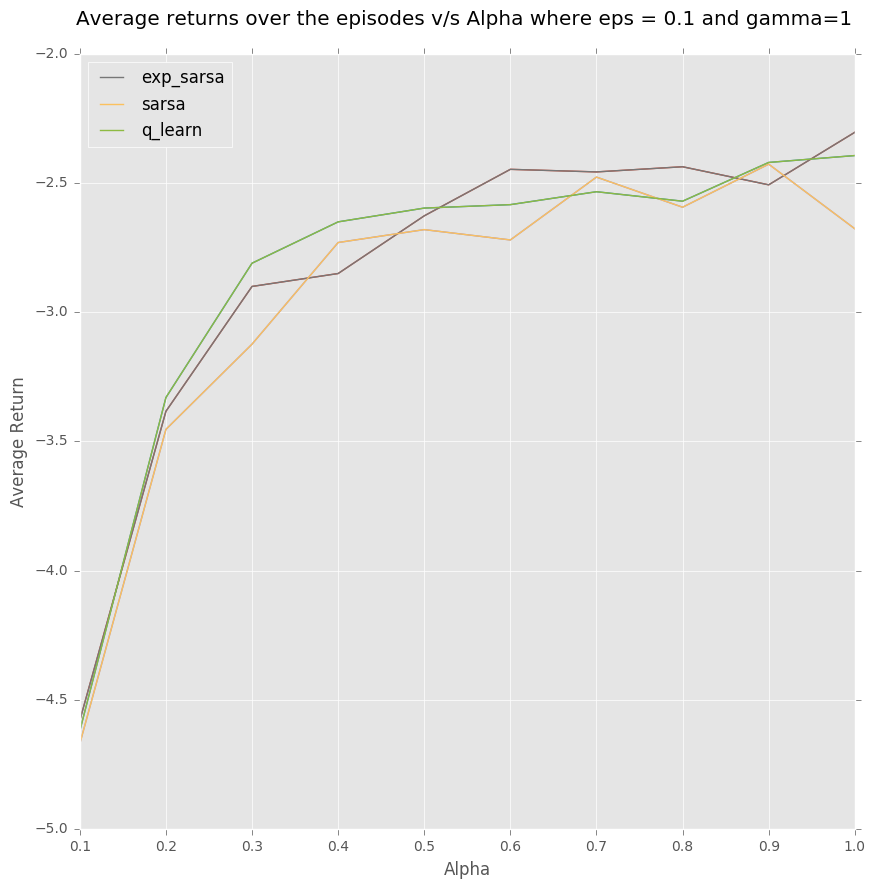

In [8]:
# Plot the above calculated statistics

plt.figure(figsize=(10,10))
    
plt.plot(alpha, avg_reward_exp_sarsa, alpha, avg_reward_q,
        alpha, avg_reward_sarsa)

plt.title("Average returns over the episodes v/s Alpha where eps = 0.1 and gamma=1 \n")
plt.xlabel('Alpha')
plt.ylabel('Average Return')

plt.plot(alpha, avg_reward_exp_sarsa, label='exp_sarsa')
plt.plot(alpha, avg_reward_sarsa, label='sarsa')
plt.plot(alpha, avg_reward_q, label='q_learn')

plt.legend(loc="upper left")

plt.show()

In [9]:
"""
Let us now plot the various alpha values and the average return over the episodes.
We can choose the number of episodes, the learning rate alpha, the discount factor,
epsilon value for the soft greedy policy
"""

#initialise the variables or ask the user to input

n_episodes = 300

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_sarsa = np.zeros([10])
avg_reward_exp_sarsa = np.zeros([10])
avg_reward_q = np.zeros([10])

eps = 0.1
gamma = 0.8

# See the average return over the episodes for all three algorithms

for i in range(10):
    
    Q_sarsa, stats_sarsa = sarsa(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_sarsa[i] = np.sum(stats_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for SARSA"
    
    
    Q_exp_sarsa, stats_exp_sarsa = expected_sarsa(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_exp_sarsa[i] = np.sum(stats_exp_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_exp_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for expected SARSA"
    
    
    Q_q, stats_q = q_learning(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_q[i] = np.sum(stats_q.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_q[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for Q learning"
    
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1
        


Average reward is -4.88666666667 for alpha= 0.1 eps= 0.1 discount factor= 0.8 for SARSA
Average reward is -4.67 for alpha= 0.1 eps= 0.1 discount factor= 0.8 for expected SARSA
Average reward is -4.84 for alpha= 0.1 eps= 0.1 discount factor= 0.8 for Q learning
Average reward is -3.66 for alpha= 0.2 eps= 0.1 discount factor= 0.8 for SARSA
Average reward is -3.41333333333 for alpha= 0.2 eps= 0.1 discount factor= 0.8 for expected SARSA
Average reward is -3.57333333333 for alpha= 0.2 eps= 0.1 discount factor= 0.8 for Q learning
Average reward is -3.23333333333 for alpha= 0.3 eps= 0.1 discount factor= 0.8 for SARSA
Average reward is -3.09333333333 for alpha= 0.3 eps= 0.1 discount factor= 0.8 for expected SARSA
Average reward is -3.08333333333 for alpha= 0.3 eps= 0.1 discount factor= 0.8 for Q learning
Average reward is -2.88666666667 for alpha= 0.4 eps= 0.1 discount factor= 0.8 for SARSA
Average reward is -2.89 for alpha= 0.4 eps= 0.1 discount factor= 0.8 for expected SARSA
Average reward is

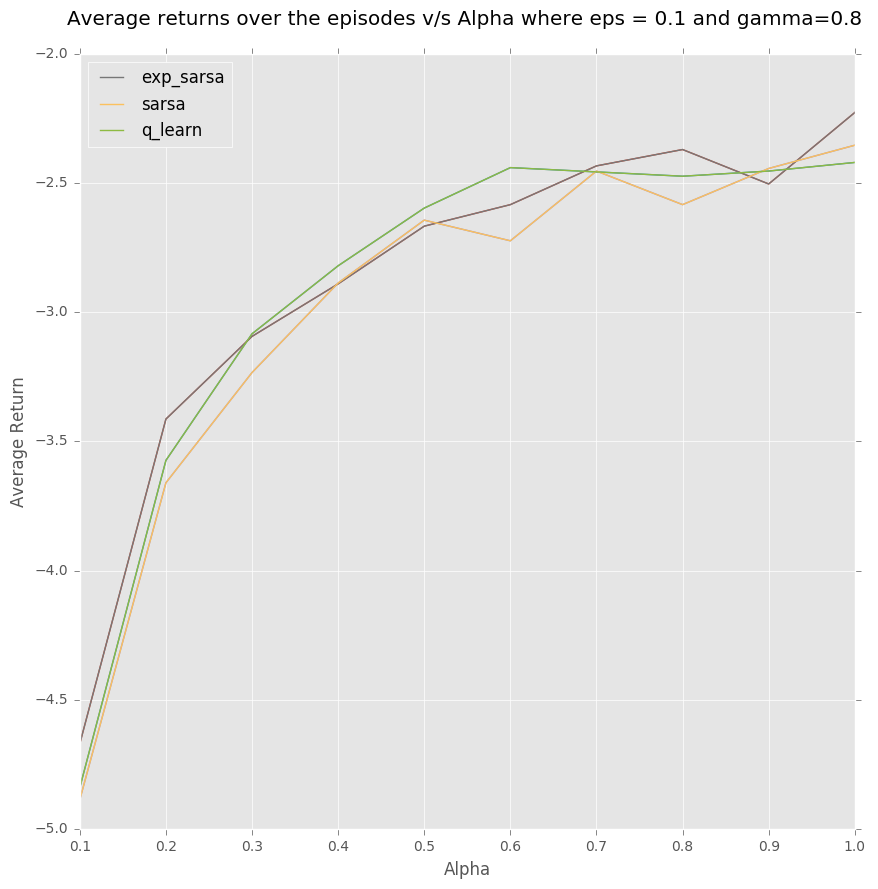

In [10]:
plt.figure(figsize=(10,10))
    
plt.plot(alpha, avg_reward_exp_sarsa, alpha, avg_reward_q,
        alpha, avg_reward_sarsa)

plt.title("Average returns over the episodes v/s Alpha where eps = 0.1 and gamma=0.8 \n")
plt.xlabel('Alpha')
plt.ylabel('Average Return')

#plt.legend([p1a, (p1a, p1b)], ["Attr A", "Attr A+B"])

plt.plot(alpha, avg_reward_exp_sarsa, label='exp_sarsa')
plt.plot(alpha, avg_reward_sarsa, label='sarsa')
plt.plot(alpha, avg_reward_q, label='q_learn')

plt.legend(loc="upper left")

plt.show()

In [11]:
"""
Let us now plot the various alpha values and the average return over the episodes.
We can choose the number of episodes, the learning rate alpha, the discount factor,
epsilon value for the soft greedy policy
"""

#initialise the variables or ask the user to input

n_episodes = 300

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_sarsa = np.zeros([10])
avg_reward_exp_sarsa = np.zeros([10])
avg_reward_q = np.zeros([10])

eps = 0.1
gamma = 0.3



for i in range(10):
    
    Q_sarsa, stats_sarsa = sarsa(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_sarsa[i] = np.sum(stats_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for SARSA"
    
    
    Q_exp_sarsa, stats_exp_sarsa = expected_sarsa(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_exp_sarsa[i] = np.sum(stats_exp_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_exp_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for expected SARSA"
    
    
    Q_q, stats_q = q_learning(env, n_episodes,alpha[i],gamma,eps)
    avg_reward_q[i] = np.sum(stats_q.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_q[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for Q learning"
    
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1
        


Average reward is -6.2 for alpha= 0.1 eps= 0.1 discount factor= 0.3 for SARSA
Average reward is -6.21333333333 for alpha= 0.1 eps= 0.1 discount factor= 0.3 for expected SARSA
Average reward is -6.25333333333 for alpha= 0.1 eps= 0.1 discount factor= 0.3 for Q learning
Average reward is -4.18333333333 for alpha= 0.2 eps= 0.1 discount factor= 0.3 for SARSA
Average reward is -4.21666666667 for alpha= 0.2 eps= 0.1 discount factor= 0.3 for expected SARSA
Average reward is -4.21666666667 for alpha= 0.2 eps= 0.1 discount factor= 0.3 for Q learning
Average reward is -3.58333333333 for alpha= 0.3 eps= 0.1 discount factor= 0.3 for SARSA
Average reward is -3.53333333333 for alpha= 0.3 eps= 0.1 discount factor= 0.3 for expected SARSA
Average reward is -3.46666666667 for alpha= 0.3 eps= 0.1 discount factor= 0.3 for Q learning
Average reward is -3.22666666667 for alpha= 0.4 eps= 0.1 discount factor= 0.3 for SARSA
Average reward is -3.11 for alpha= 0.4 eps= 0.1 discount factor= 0.3 for expected SARSA


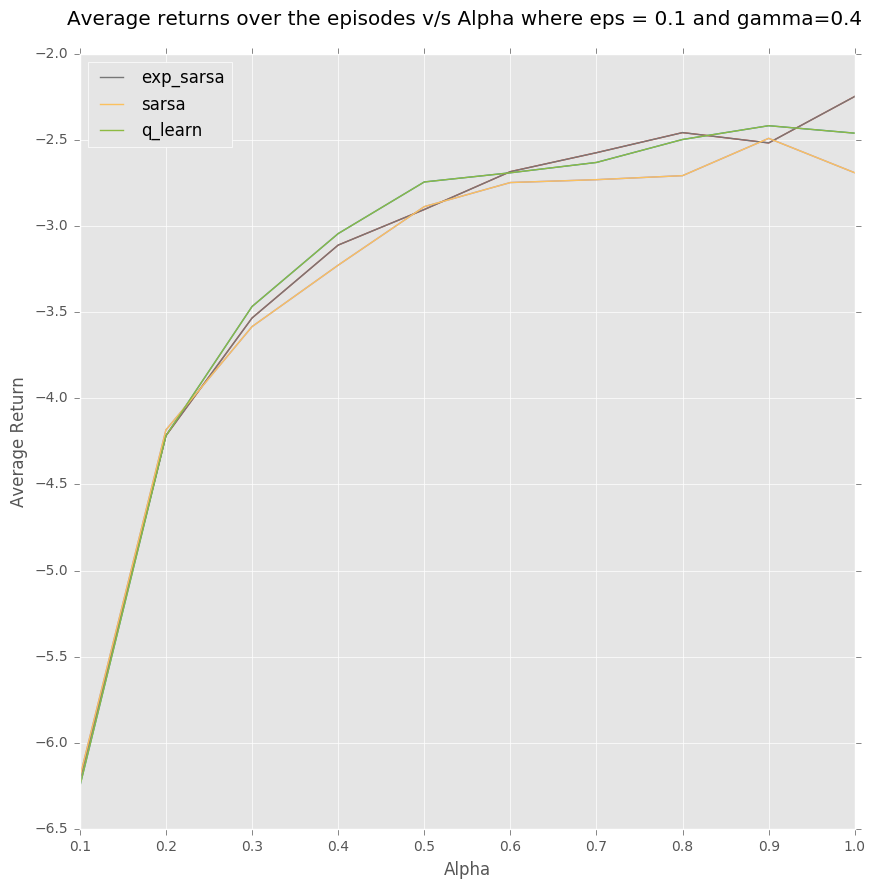

In [12]:
plt.figure(figsize=(10,10))
    
plt.plot(alpha, avg_reward_exp_sarsa, alpha, avg_reward_q,
        alpha, avg_reward_sarsa)

plt.title("Average returns over the episodes v/s Alpha where eps = 0.1 and gamma=0.4 \n")
plt.xlabel('Alpha')
plt.ylabel('Average Return')

#plt.legend([p1a, (p1a, p1b)], ["Attr A", "Attr A+B"])

plt.plot(alpha, avg_reward_exp_sarsa, label='exp_sarsa')
plt.plot(alpha, avg_reward_sarsa, label='sarsa')
plt.plot(alpha, avg_reward_q, label='q_learn')

plt.legend(loc="upper left")

plt.show()

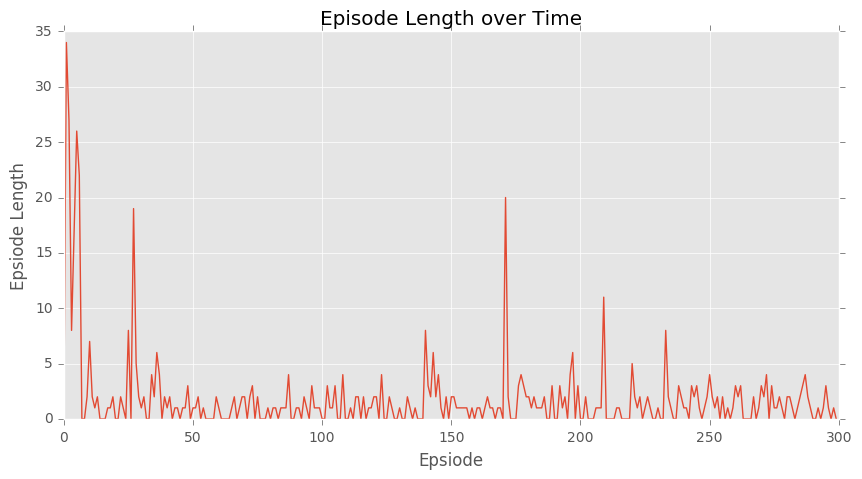

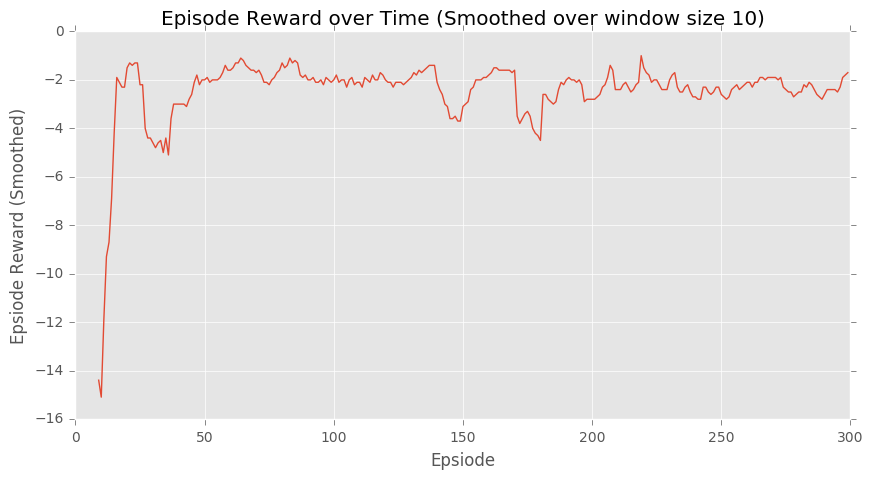

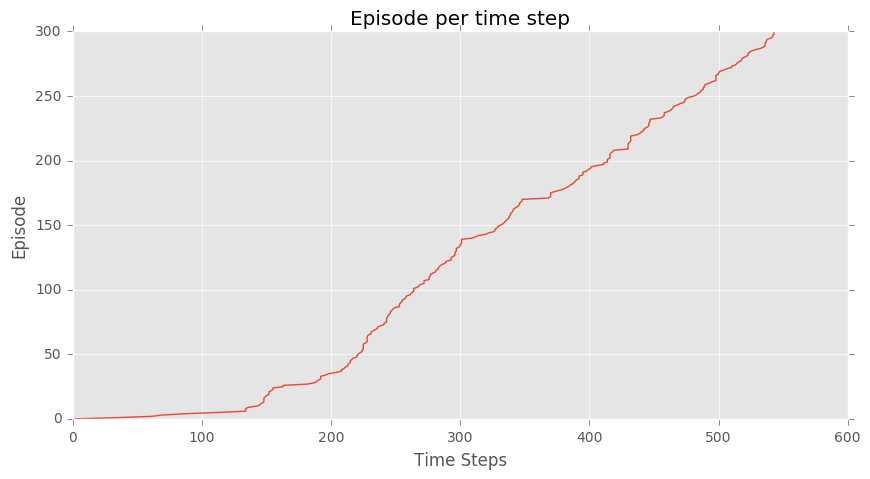

(<matplotlib.figure.Figure at 0x11380f850>,
 <matplotlib.figure.Figure at 0x114d77e10>)

In [13]:
"""
Sample Statistics done only for expected sarsa for the sake of clarity:

1. Episode length vs Number of episodes
2. Episode average reward vs Number of episodes
3. Number of episodes vs Time


"""

plotting.plot_episode_stats(stats_sarsa)

# The End
In the future assignments, I will try to play around with more variants of Monte Carlo, TD learning, mulit-step bootstrapping methods.
Credits and references:
[1] Van Seijen, H., Van Hasselt, H., Whiteson, S. and Wiering, M., 2009, March. A theoretical and empirical analysis of Expected Sarsa. In Adaptive Dynamic Programming and Reinforcement Learning, 2009. ADPRL'09. IEEE Symposium on (pp. 177-184). IEEE.
Vancouver	

[2] Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction. Vol. 1. No. 1. Cambridge: MIT press, 1998.

[3] http://www.wildml.com/